In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from math import ceil

In [29]:
def generate_utility(v1, v2, q1, q2, n):
    length = max(q1 + 1 + n, q2 + 1 + n)
    array_q = np.arange(length)
    array_u1 = np.concatenate((v1 * array_q[:q1 + 1], v1 * q1 * np.ones(length - q1 - 1)))
    array_u2 = np.concatenate((v2 * array_q[:q2 + 1], v2 * q2 * np.ones(length - q2 - 1)))
    return array_q, array_u1, array_u2

### Positive Relationship between $v$ and $\bar{q}$

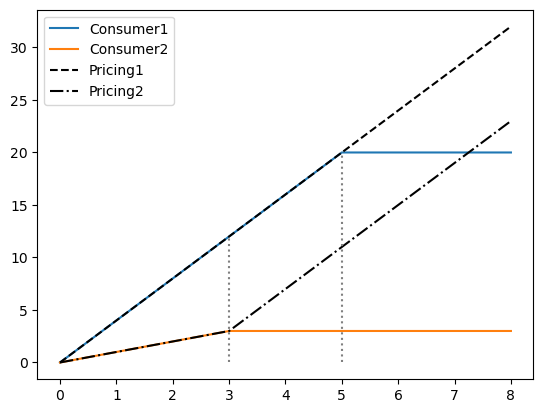

In [30]:
vl, vh, ql, qh = 1, 4, 3, 5
v1, v2, q1, q2 = vh, vl, qh, ql
q, u1, u2 = generate_utility(v1, v2, q1, q2, 3)
beta0 = q2 * (v2 - v1)

plt.plot(q, u1, label = "Consumer1")
plt.plot(q, u2, label = "Consumer2")
plt.plot(q, v1 * q,
         linestyle="--",
         label = "Pricing1",
         color = "black")
plt.plot(q, np.concatenate((u2[:q2], beta0 + v1 * q[q2:])),
         linestyle="-.",
         label = "Pricing2",
         color = "black")
# plt.plot(q, np.concatenate((u2[:q2 - 1], beta0 + v1 * (q[q2 - 1:] + 1))),
#          linestyle = "--",
#          color = "black")

for x, ym in {# q2 - 2: u1[q2 - 2],
              q2: u1[q2],
              q1: u1[q1]}.items():
    plt.vlines(x = x, ymin = 0, ymax = ym,
               linestyle = ":",
               colors = "gray")
plt.legend();

plt.savefig("op_pricing.svg", dpi=400)

### Negative Relationship between $v$ and $\bar{q}$

CASE 1: $\frac{v_h}{v_l} < \frac{\bar{q}_h}{\bar{q}_l}$

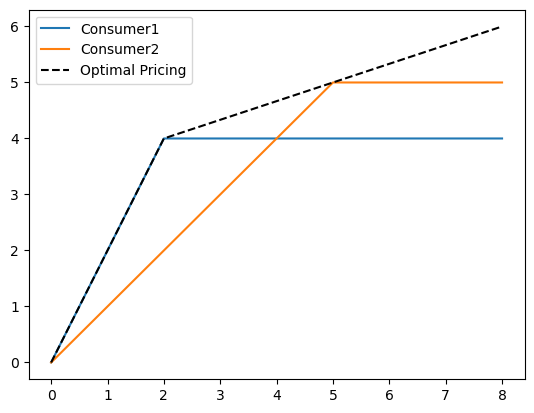

In [31]:
vl, vh, ql, qh = 1, 2, 2, 5
v1, v2, q1, q2 = vh, vl, ql, qh
q, u1, u2 = generate_utility(v1, v2, q1, q2, 3)

beta1 = (v2 * q2 - v1 * q1) / (q2 - q1)
beta0 = q1 * q2 * (v1 - v2) / (q2 - q1)

plt.plot(q, u1, label = "Consumer1")
plt.plot(q, u2, label = "Consumer2")
plt.plot(q, np.concatenate((u1[:ql], beta0 + beta1 * q[ql:])),
         linestyle="--",
         label = "Optimal Pricing",
         color = "black")
plt.legend();

plt.savefig("op_pricing_case1.svg", dpi=400)

CASE 2: $\frac{v_h}{v_l} \geq \frac{\bar{q}_h}{\bar{q}_l}$

(a) $(v_h - c_2)q_l \leq (v_l - c_2)q_h + v_h\lfloor \frac{v_l q_h}{v_h} \rfloor - c_2 q_l$

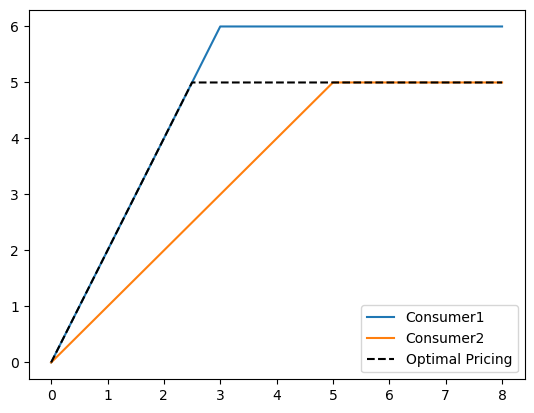

In [32]:
vl, vh, ql, qh = 1, 2, 3, 5
v1, v2, q1, q2 = vh, vl, ql, qh
q, u1, u2 = generate_utility(v1, v2, q1, q2, 3)
tp = v2 * q2 / v1
q_p = sorted(np.append(q, tp))

plt.plot(q, u1, label = "Consumer1")
plt.plot(q, u2, label = "Consumer2")
plt.plot(q_p, np.concatenate((u1[:ceil(tp)], v2 * q2 * np.ones(len(u1) - ceil(tp) + 1))),
         linestyle="--",
         label = "Optimal Pricing",
         color = "black")
plt.legend();

plt.savefig("op_pricing_case2a.svg", dpi=400)

(b)  $(v_h - c_2)q_l > (v_l - c_2)q_h + v_h\lfloor \frac{v_l q_h}{v_h} \rfloor - c_2 q_l$

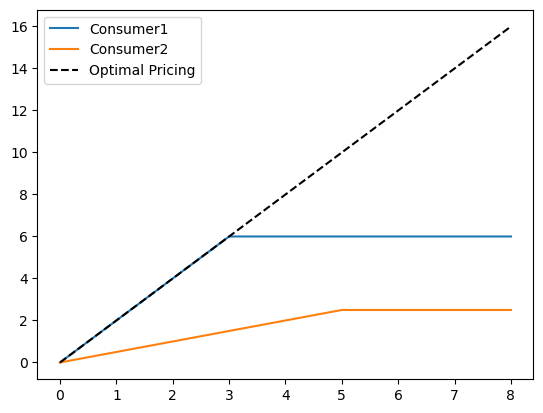

In [33]:
vl, vh, ql, qh = 0.5, 2, 3, 5
v1, v2, q1, q2 = vh, vl, ql, qh
q, u1, u2 = generate_utility(v1, v2, q1, q2, 3)

plt.plot(q, u1, label = "Consumer1")
plt.plot(q, u2, label = "Consumer2")
plt.plot(q, v1 * q,
         linestyle="--",
         label = "Optimal Pricing",
         color = "black")
plt.legend();

plt.savefig("op_pricing_case2b.svg", dpi=400)

### Special Example

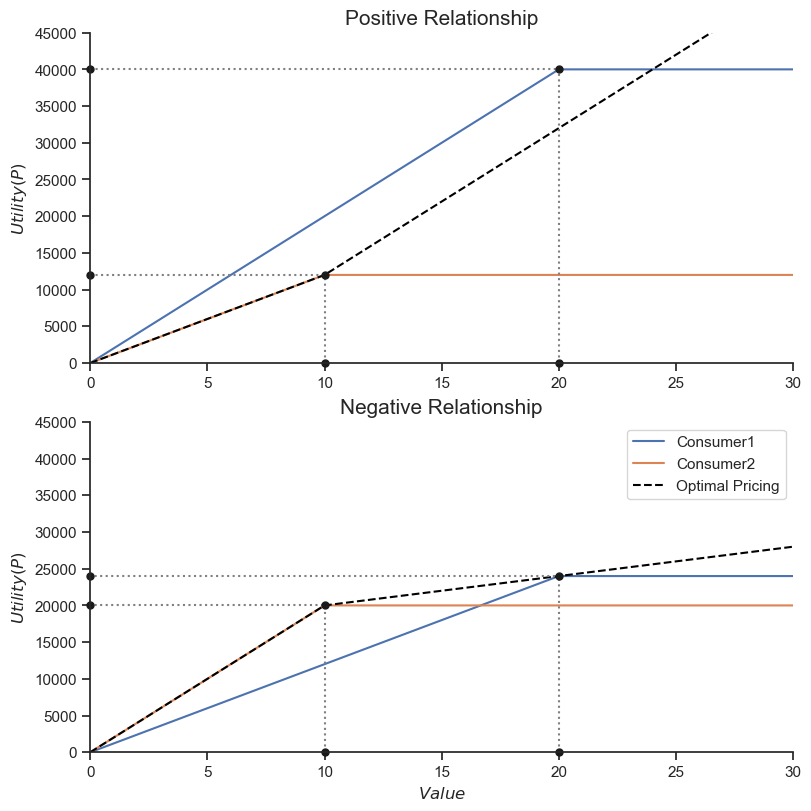

In [92]:
vl, vh, ql, qh = 1200, 2000, 10, 20
v1, v2, q1, q2 = vh, vl, qh, ql
v1_1, v2_1, q1_1, q2_1 = vl, vh, qh, ql

q, u1, u2 = generate_utility(v1, v2, q1, q2, 10)
q_1, u1_1, u2_1 = generate_utility(v1_1, v2_1, q1_1, q2_1, 10)

figure, axis = plt.subplots(2, 1, figsize=(8, 8), constrained_layout=True)
ax1, ax2 = axis

ax1.plot(q, u1, label = "Consumer1")
ax1.plot(q, u2, label = "Consumer2")
ax1.plot(q, np.concatenate((u2[:q2], q2 * (v2 - v1) + v1 * q[q2:])),
         linestyle="--",
         label = "Optimal Pricing",
         color = "black")
for x, ym in {q1: u1[q1], q2: u2[q2]}.items():
    ax1.vlines(x = x, ymin = 0, ymax = ym,
               linestyle = ":",
               colors = "gray")
    ax1.hlines(y = ym, xmin = 0, xmax = x,
               linestyle = ":",
               colors = "gray")
    ax1.plot([x, 0, x], [ym, ym, 0], "ko", ms=5, clip_on=False)
ax1.set_title("Positive Relationship", fontsize=15)

beta1 = (v2_1 * q2_1 - v1_1 * q1_1) / (q2_1 - q1_1)
beta0 = q1_1 * q2_1 * (v1_1 - v2_1) / (q2_1 - q1_1)

ax2.plot(q_1, u1_1, label = "Consumer1")
ax2.plot(q_1, u2_1, label = "Consumer2")
plt.plot(q, np.concatenate((u1[:ql], beta0 + beta1 * q[ql:])),
         linestyle="--",
         label = "Optimal Pricing",
         color = "black")
for x, ym in {q1_1: u1_1[q1_1], q2_1: u2_1[q2_1]}.items():
    ax2.vlines(x = x, ymin = 0, ymax = ym,
               linestyle = ":",
               colors = "gray")
    ax2.hlines(y = ym, xmin = -1, xmax = x,
               linestyle = ":",
               colors = "gray")
    ax2.plot([x, 0, x], [ym, ym, 0], "ko", ms=5, clip_on=False)
ax2.set_title("Negative Relationship", fontsize=15)
ax2.set_xlabel("$Value$")
ax2.legend()

for ax in axis:
    ax.set_xlim([0, max(q)])
    ax.set_ylim([0, 45000])
    ax.set_ylabel("$Utility(P)$")
    sns.despine(ax=ax, offset=0)

plt.savefig("comparison.svg", dpi=400)